## Final Project Submission

Please fill out:
* Student name: Andrew Baraka 
* Student pace: Part time
* Scheduled project review date/time:18/02/2024 
* Instructor name: Noah Kandie
* Blog post URL:


## Overview

Microsoft is looking to venture into the world of original video content creation by establishing a new movie studio. However, lacking experience in the film industry, they have tasked you with researching the current trends in successful films at the box office. Your goal is to identify the types of films that are performing well and translate these findings into actionable insights for the head of Microsoft’s new movie studio. By understanding the preferences of audiences and the types of films that are resonating with them, Microsoft can make informed decisions on the types of movies to create in order to maximize their chances of success in this new venture.

## Business Problem

Microsoft is entering the competitive world of original video content creation by establishing a new movie studio without prior experience in the film industry. The lack of knowledge and understanding about creating successful movies poses a significant challenge for the company. In order to make informed decisions and increase the chances of success in this new venture, Microsoft must identify the types of films that are currently performing well at the box office. The challenge lies in translating these findings into actionable insights that can guide the decision-making process for the head of Microsoft’s new movie studio. By leveraging market research and understanding audience preferences, Microsoft needs to determine the most suitable film genres and content that will resonate with viewers and drive box office success.

### Data Understanding

In [138]:
# Your code here - remember to use markdown cells for comments as well!
#import standard packages
import pandas as pd
import csv 
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [50]:
df1 = pd.read_csv(r'/Users/andrewbaraka/Documents/project/dsc-phase-1-project/zippedData/bom.movie_gross.csv')
df1


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [51]:
df2= pd.read_csv(r'/Users/andrewbaraka/Documents/project/dsc-phase-1-project/zippedData/imdb.title.basics.csv.gz')
df2


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [52]:
df3 = pd.read_csv(r'/Users/andrewbaraka/Documents/project/dsc-phase-1-project/zippedData/imdb.title.ratings.csv.gz')
df3

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


#### Merging Data Sets

In [59]:
#join the df2(basics) and df3(rating).
#they have tconst in common
merged_df2n3 = pd.merge(df2, df3, on = 'tconst')
merged_df2n3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [60]:
merged_df2n3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [61]:
merged_df2n3.shape

(73856, 8)

In [62]:
##we will merge df1(movie gross) and df2(basics) using the common column which is title column which is named differently. So we'll convert the column in df1 to primary_title
df1 = df1.rename(columns = {'title': 'primary_title'})
df1.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [103]:
##now lets merge df1 and df2 b
df4 = pd.merge(merged_df2n3, df1, on='primary_title', how='inner')
df4.head(10)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015
7,tt0372538,Spy,Spy,2011,110.0,"Action,Crime,Drama",6.6,78,Fox,110800000.0,124800000,2015
8,tt3079380,Spy,Spy,2015,119.0,"Action,Comedy,Crime",7.0,213908,Fox,110800000.0,124800000,2015
9,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,FD,13100000.0,10800000,2011


In [104]:
df4.tail()


,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018
3026,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000,2018


In [106]:
df4.shape

(3027, 12)

In [107]:
df4.copy()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


#### Data Cleaning

In [108]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 283.9+ KB


In [109]:
df4.isna().any()

tconst             False
primary_title      False
original_title     False
start_year         False
runtime_minutes     True
genres              True
averagerating      False
numvotes           False
studio              True
domestic_gross      True
foreign_gross       True
year               False
dtype: bool

In [110]:
df4.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [112]:
df4.isnull().mean()

tconst             0.000000
primary_title      0.000000
original_title     0.000000
start_year         0.000000
runtime_minutes    0.015527
genres             0.002313
averagerating      0.000000
numvotes           0.000000
studio             0.000991
domestic_gross     0.007268
foreign_gross      0.394780
year               0.000000
dtype: float64

After looking at the missin values next step should be dropping a column like foreign_gross because of its high number of missing values but I will not drop the column because it will assist me in my analysis.

In [154]:
# df4.apply(lambda x: x.fillna(x.mean()),axis=0)
# df4 = df4.fillna(df4.mean()
df4.isnull().sum()

Tconst             0
Primary_title      0
Start_year         0
Runtime_minutes    0
Genres             0
Average_Rating     0
Num_votes          0
Studio             0
Domestic_gross     0
Foreign_gross      0
Year               0
dtype: int64

In [130]:
df4.isnull().sum()

tconst                0
primary_title         0
original_title        0
start_year            0
runtime_minutes       0
genres                7
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
dtype: int64

In [133]:
#fill the missing values in the foreign_gross column
df4['foreign_gross'] = pd.to_numeric(df4['foreign_gross'], errors='coerce')
df4['foreign_gross'].fillna(df4['foreign_gross'].mean(), inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  3027 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    3027 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 283.9+ KB


In [134]:
most_common_studio = df4['studio'].value_counts().idxmax()
count = df4['studio'].value_counts().max()

print(most_common_studio)
print(count)

Uni.
156


In [135]:
most_common_genres = df4['genres'].value_counts().idxmax()
count_1 = df4['genres'].value_counts().max()

print(most_common_genres)
print(count_1)

Drama
317


In [136]:
df4['genres'] = df4['genres'].fillna('Drama')
df4['studio'] = df4['studio'].fillna('Uni')

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3027 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3027 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 283.9+ KB


In [141]:
df4['domestic_gross'] = pd.to_numeric(df4['domestic_gross'], errors='coerce')
df4['domestic_gross'].fillna(df4['domestic_gross'].mean(), inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  3027 non-null   float64
 5   genres           3027 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3027 non-null   object 
 9   domestic_gross   3027 non-null   float64
 10  foreign_gross    3027 non-null   float64
 11  year             3027 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 283.9+ KB


In [142]:
#drop values
df4.drop(columns=['original_title'], inplace=True)
df4.head()


,tconst,primary_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,7.843093e+07,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8.000000e+06,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8.000000e+06,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013


In [143]:
#duplicate values
df4.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3022    False
3023    False
3024    False
3025    False
3026    False
Length: 3027, dtype: bool

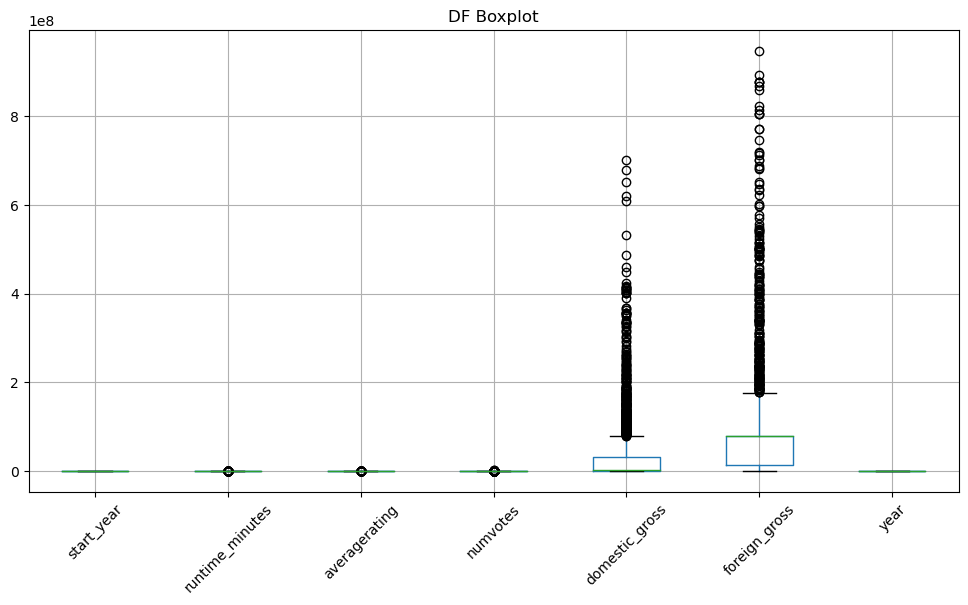

In [144]:
#handling outliers
# Create a larger figure
plt.figure(figsize=(12, 6))

# Create a boxplot of the DataFrame with rotated x-axis labels
df4.boxplot()
plt.xticks(rotation=45)

# Add a title to the plot
plt.title('Outliers')

# Display the plot
plt.show()


Here we can see the two columns that have outliers are domestic gross and foreigh gross. We are not going to get rid of the outliers because we can draw insights from these colmns. 

In [147]:
#looking for skewed distribution in the columns
df4.domestic_gross.skew()


4.167477501645865

In [148]:
#looking for skewed distribution in the columns
df4.foreign_gross.skew()


3.8524090441455057

In [149]:
#capitalize the column titles
df4.columns = df4.columns.str.capitalize()
df4.head()


,Tconst,Primary_title,Start_year,Runtime_minutes,Genres,Averagerating,Numvotes,Studio,Domestic_gross,Foreign_gross,Year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,7.843093e+07,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8.000000e+06,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8.000000e+06,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013


In [151]:
df4.rename(columns={'Averagerating': 'Average_Rating'}, inplace=True)
df4.rename(columns={'Numvotes': 'Num_votes'}, inplace=True)
df4.head()


,Tconst,Primary_title,Start_year,Runtime_minutes,Genres,Average_Rating,Num_votes,Studio,Domestic_gross,Foreign_gross,Year
0,tt0315642,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,7.843093e+07,2016
1,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8.000000e+06,2012
2,tt4339118,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8.000000e+06,2012
3,tt5647250,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8.000000e+06,2012
4,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,1.299000e+08,2013


### Exploratory Data Analysis
1) The Most Popular movie

In [155]:
most_popular_movie = df4[df4['Average_Rating'] == df4['Average_Rating'].max()]
print('The Popular movie is:')
print(most_popular_movie[['Primary_title', 'Average_Rating', 'Genres', 'Runtime_minutes']])

The Popular movie is:
    Primary_title  Average_Rating       Genres  Runtime_minutes
173  The Runaways             9.2    Adventure            108.0
658      The Wall             9.2  Documentary             78.0


In [156]:
top_5_movies = df4.sort_values(by='Average_Rating', ascending=False).head(5)
print("Top 5 populare movies are :")
print(top_5_movies[['Primary_title', 'Average_Rating', 'Genres', 'Runtime_minutes']])


Top 5 populare movies are :
     Primary_title  Average_Rating                    Genres  Runtime_minutes
173   The Runaways             9.2                 Adventure            108.0
658       The Wall             9.2               Documentary             78.0
2039      Tomorrow             9.1                     Drama            115.0
638        The Way             9.0               Documentary             85.0
1186     The Mayor             8.9  Comedy,Documentary,Drama             68.0


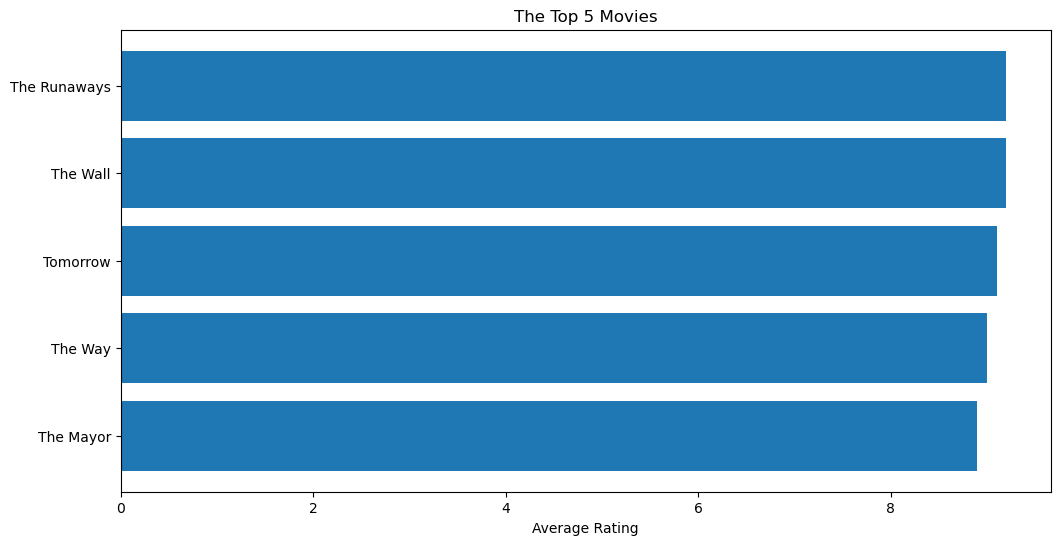

In [157]:
titles = top_5_movies['Primary_title']
ratings = top_5_movies['Average_Rating']

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.barh(titles, ratings)
plt.xlabel('Average Rating')
plt.title('The Top 5 Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top
plt.show()

From this analysis, we can see the movies with the highest rating. We are able to look at the genres and how long the movies last. This helps us understand what the views like to watch and hw long they are willing to sit and watch the movies.

-We see that these two ppular mvies are of the genre of Adventure and Documentary. Also, 

-Both the movies have a runtime of less than 120 minutes


2) Unpopular Movies

Here we are going to look at the unpopular movies and make a deduction as to why they may be unpopular.

In [158]:
unpopular_movie = df4[df4['Average_Rating'] == df4['Average_Rating'].min()]
print("The Most Unpopular Movie is:")
print(unpopular_movie[['Primary_title', 'Average_Rating', 'Genres', 'Runtime_minutes']])

The Most Unpopular Movie is:
                       Primary_title  Average_Rating                Genres  \
1110  Justin Bieber: Never Say Never             1.6     Documentary,Music   
3002                 Namaste England             1.6  Comedy,Drama,Romance   

      Runtime_minutes  
1110            105.0  
3002            141.0  


In [159]:
top_5_unpopular = df4.sort_values(by='Average_Rating', ascending=True).head(5)
print("The unpopular movies are:")
print(top_5_unpopular[['Primary_title', 'Average_Rating', 'Genres', 'Runtime_minutes']])

The unpopular movies are:
                       Primary_title  Average_Rating                Genres  \
1110  Justin Bieber: Never Say Never             1.6     Documentary,Music   
3002                 Namaste England             1.6  Comedy,Drama,Romance   
60                        The Losers             1.7                 Drama   
1843                      Himmatwala             1.7   Action,Comedy,Drama   
2119                             Amy             1.9                Horror   

      Runtime_minutes  
1110            105.0  
3002            141.0  
60              112.0  
1843            150.0  
2119             94.0  


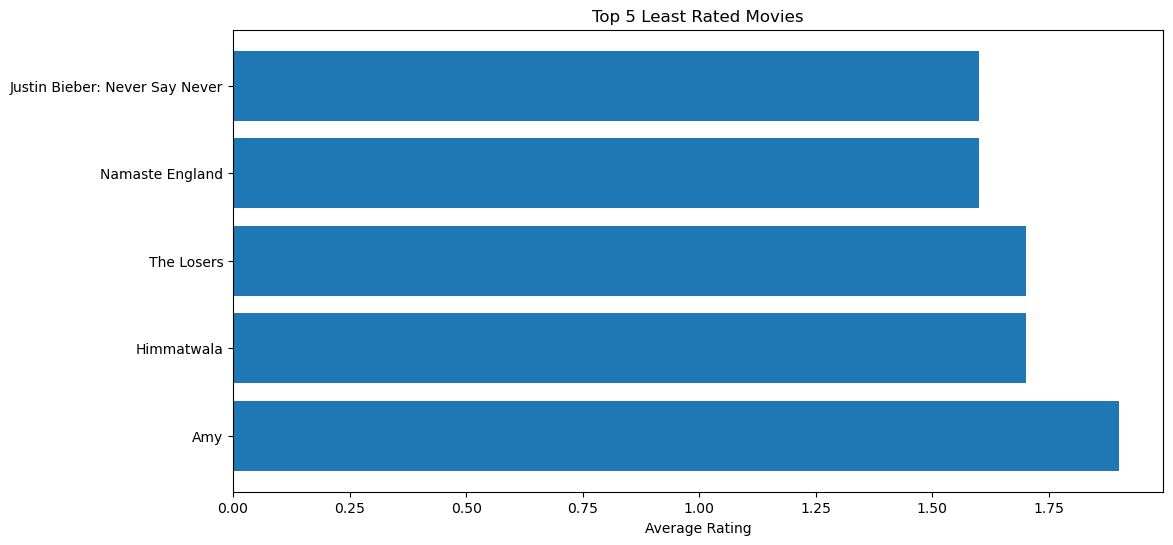

In [160]:
titles = top_5_unpopular['Primary_title']
ratings = top_5_unpopular['Average_Rating']

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.barh(titles, ratings)
plt.xlabel('Average Rating')
plt.title('Top 5 Least Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest rating at the top
plt.show()


When we look at this analysis, we can be able to come up with the conclusion that the most movies which are disliked have more than one genre. 

- For example "Namaste England" is movie that has genres more than one. 
- So we can come to the conclusion that people prefer watching movies that are classified under one genre. 


Because we are building a conclusion that is inclining to the genres of the movies shown. 


#### Let us analyse the genres of the movies from our sources. 

In [165]:
# Split the 'genres' column and create a new DataFrame with one genre per row
genres_1 = df4['Genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genres_1 = genres_1.str.strip()  # Remove leading and trailing whitespace

# Merge the genres DataFrame with the original DataFrame
df4_genres = df4.merge(genres_1, left_index=True, right_index=True)

# Calculate the average rating for each genre
genre_avg =df4_genres.groupby('genre')['Average_Rating'].mean().sort_values(ascending=False)
genre_avg

genre
Documentary    7.292511
News           7.100000
Biography      6.973333
History        6.878676
Sport          6.867925
War            6.801961
Music          6.756522
Animation      6.700000
Drama          6.587181
Western        6.561905
Crime          6.479581
Adventure      6.478360
Sci-Fi         6.451111
Romance        6.335470
Musical        6.316667
Action         6.275232
Mystery        6.274879
Comedy         6.247624
Fantasy        6.242353
Family         6.224786
Thriller       6.172627
Horror         5.684583
Name: Average_Rating, dtype: float64

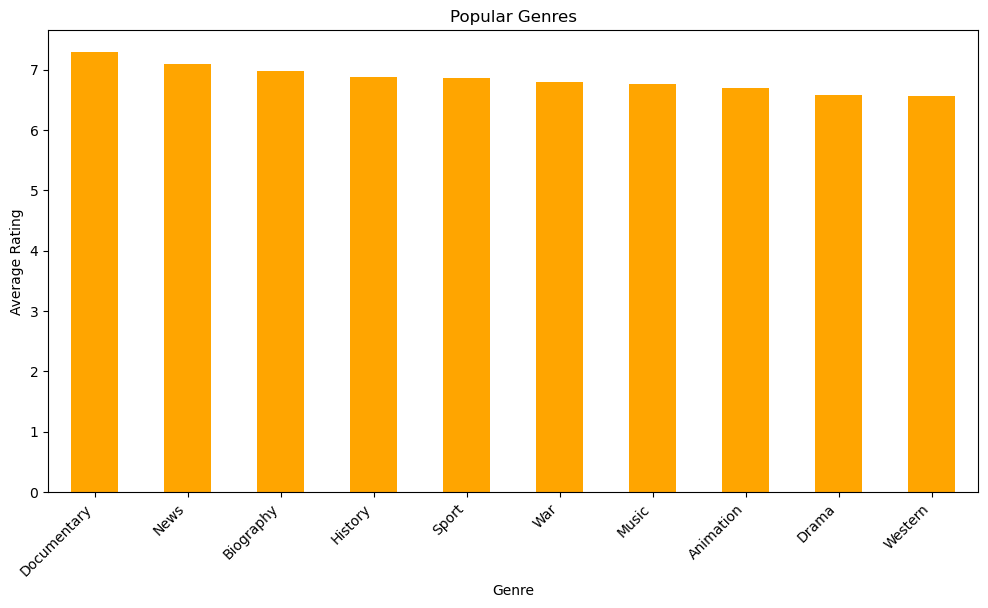

In [175]:
# Plotting the top rated genres
plt.figure(figsize=(12, 6))
genre_avg.head(10).plot(kind='bar', color='orange')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

The top 5 genres are:

-Documentaries
-News
-Biographies
-History and
-Sports.

Meaning these are the most watched genres over the years. 

#### We are just from analysing the most watched genres by people. Now let's look at the most produced genres by studios. 

In [169]:
genres_1 = df4['Genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genres_1 = genres_1.str.strip()

# Count the occurrences of each genre
top_genres = genres_1.value_counts().nlargest(10)

print("Top 5 most produced movie genres:")
print(top_genres)


Top 5 most produced movie genres:
genre
Drama          1763
Comedy          926
Action          646
Romance         468
Thriller        453
Adventure       439
Crime           382
Biography       285
Horror          240
Documentary     227
Name: count, dtype: int64


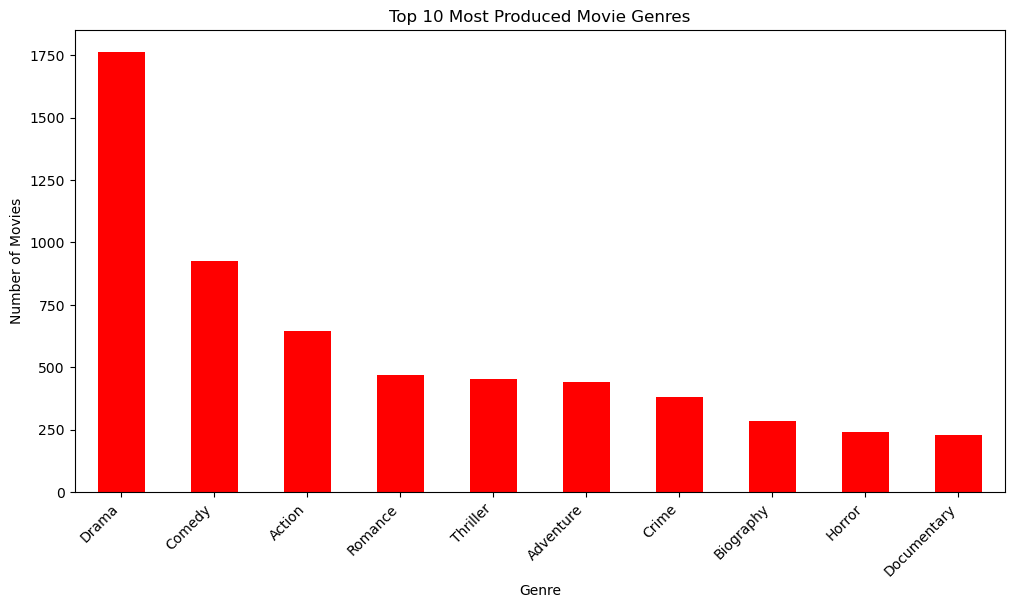

In [176]:
# Plot the top genres
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='red')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 10 Most Produced Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

With these representation the most produced genres are

-Drama
-Comedy
-Action
-Romance 
-Thriller

Studios prefer to shoot movies in the specific genres. 


#### Let us look at the genres that are least in production.

In [171]:
# Split the 'Genres' column and stack them
genres_1 = df4['Genres'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genres_1 = genres_1.str.strip()

# Count the occurrences of each genre
least_produced_genres = genres_1.value_counts().nsmallest(5)
least_produced_genres


genre
News        4
Musical    18
Western    21
War        51
Sport      53
Name: count, dtype: int64

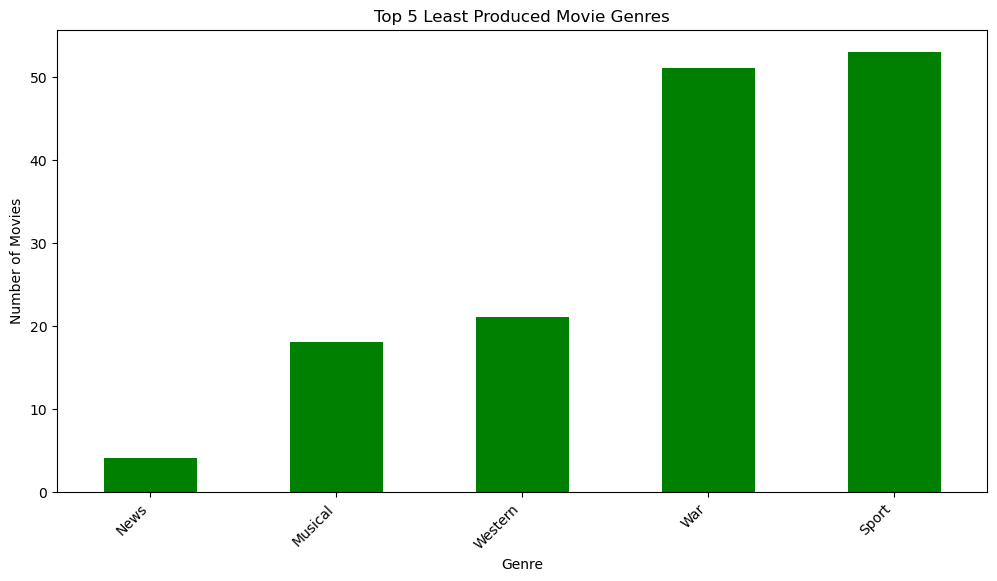

In [178]:
plt.figure(figsize=(12, 6))
least_produced_genres.plot(kind='bar', color='green')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Top 5 Least Produced Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.show()


Contrary to what viewers like many studios prefer to shoot News,sports movies which are very popular they are among the least produced. 

#### Now we will look at the genres wich have reaked in highest gross domestically i.e. US and Canada. 

In [180]:
# Split the 'Genres' column into individual genres
genres_1 = df4['Genres'].str.split(',', expand=True)

# Stack the genres and reset the index
genres_stack = genres_1.stack().reset_index(level=1, drop=True).rename('genre')

# Merge the stacked genres back to the original DataFrame
df4_split = df4.merge(genres_stack, left_index=True, right_index=True)

# Group by genre and sum the domestic gross for each genre
genre_domestic_gross = df4_split.groupby('genre')['Domestic_gross'].sum()

# Select the top 5 genres with the highest total domestic gross
top_5_genres_domestic_gross = genre_domestic_gross.nlargest(5)
top_5_genres_domestic_gross

genre
Adventure    4.176354e+10
Action       3.823409e+10
Comedy       3.164528e+10
Drama        2.940409e+10
Sci-Fi       1.498404e+10
Name: Domestic_gross, dtype: float64

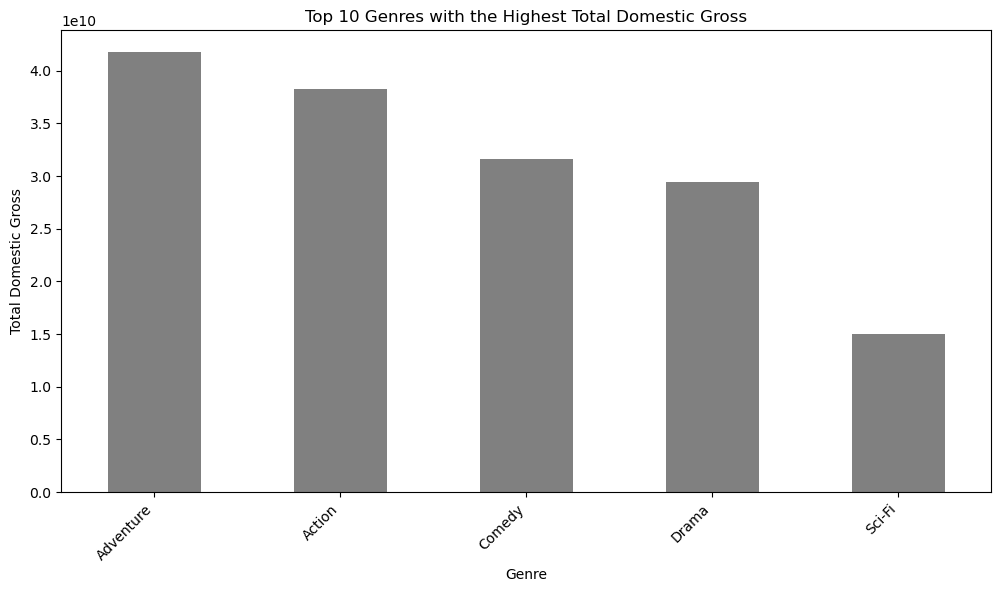

In [181]:
plt.figure(figsize=(12, 6))
top_5_genres_domestic_gross.plot(kind='bar', color='grey')
plt.xlabel('Genre')
plt.ylabel('Total Domestic Gross')
plt.title('Top 10 Genres with the Highest Total Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

In [182]:
# Split the 'Genres' column into individual genres
genres_1 = df4['Genres'].str.split(',', expand=True)

# Stack the genres and reset the index
genres_stack = genres_1.stack().reset_index(level=1, drop=True).rename('genre')

# Merge the stacked genres back to the original DataFrame
df4_split = df4.merge(genres_stack, left_index=True, right_index=True)

# Group by genre and sum the domestic gross for each genre
genre_domestic_gross = df4_split.groupby('genre')['Domestic_gross'].sum()

# Select the top 5 genres with the highest total domestic gross
top_5_genres_domestic_gross = genre_domestic_gross.nsmallest(5)
top_5_genres_domestic_gross

genre
News       2.164140e+07
War        2.604493e+08
Western    5.187837e+08
Musical    5.505853e+08
Music      1.625713e+09
Name: Domestic_gross, dtype: float64

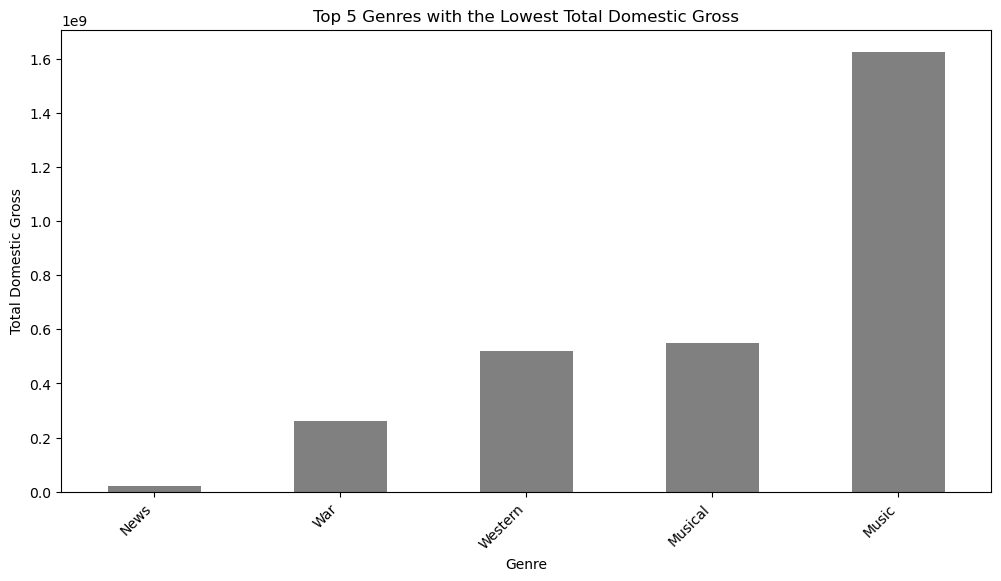

In [184]:
plt.figure(figsize=(12, 6))
top_5_genres_domestic_gross.plot(kind='bar', color='grey')
plt.xlabel('Genre')
plt.ylabel('Total Domestic Gross')
plt.title('Top 5 Genres with the Lowest Total Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

When we look at the data here we see that Adventure , action, comedy, drama, sci-fi have a high domestic gross making more reasons as to why genres such as action, drama and comedy are highly produced by studios. 
For the least produced we have news which is among the top rated genres. This means studios look focus more on the gross income that comes from movie produced rather than what is highly rated.  

#### Let us now compare which genres are most produced and have the highest domestic gross. 


In [186]:
genres_1 = df4['Genres'].str.split(',', expand=True)

# Stack the genres and reset the index
genres_stack = genres_1.stack().reset_index(level=1, drop=True).rename('genre')

# Merge the stacked genres back to the original DataFrame
df4_split = df4.merge(genres_stack, left_index=True, right_index=True)

# Group by genre and count the number of movies produced and sum the domestic gross for each genre
genre_domestic_gross = df4_split.groupby('genre').agg({'Start_year': 'count', 'Domestic_gross': 'sum'})

# Rename the columns for clarity
genre_domestic_gross = genre_domestic_gross.rename(columns={'Start_year': 'movie_count'})

# Select the top 5 genres with the highest total domestic gross
top_5_genres_domestic_gross = genre_domestic_gross.nlargest(5, 'Domestic_gross')
top_5_genres_domestic_gross

,movie_count,Domestic_gross
genre,,
Adventure,439,4.176354e+10
Action,646,3.823409e+10
Comedy,926,3.164528e+10
Drama,1763,2.940409e+10
Sci-Fi,135,1.498404e+10


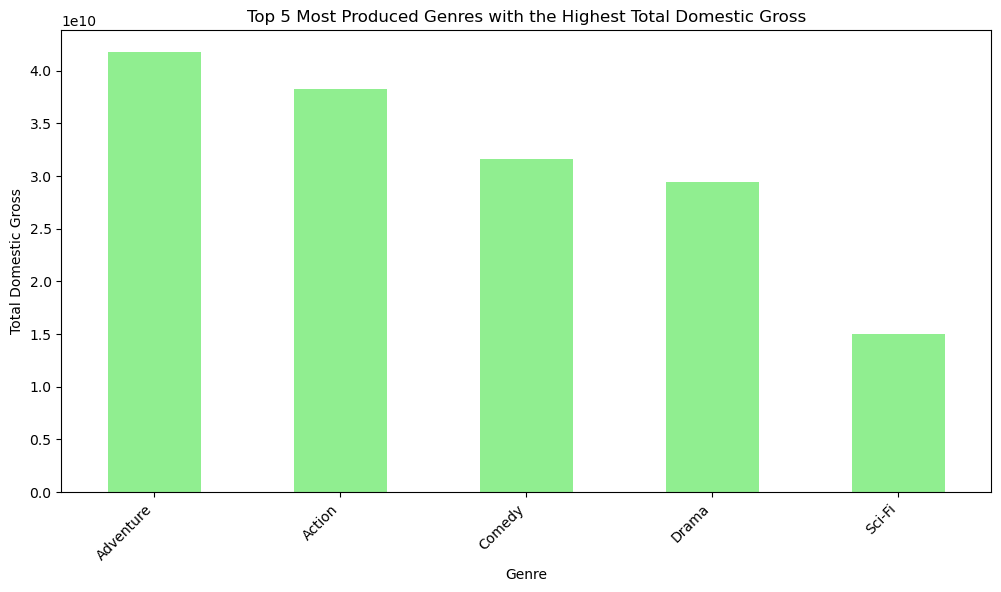

In [187]:
plt.figure(figsize=(12, 6))
top_5_genres_domestic_gross['Domestic_gross'].plot(kind='bar', color='lightgreen')
plt.xlabel('Genre')
plt.ylabel('Total Domestic Gross')
plt.title('Top 5 Most Produced Genres with the Highest Total Domestic Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

In the above analysis we looked at which genres that are produced have a high domestic gross. I have noticed that drama and sci-fi which weren't in the top five most produced genres have now appeared in this list. 
This makes me see that domestic gross is gotten through other means other than streaming or watching of the movies. 
So as a studio, microsoft should seek other means of getting returns and not stick to just streaming of movies. eg. merchandising

#### Let us now look at genres with the highest foreign gross

In [188]:
# Group by genre and sum the foreign gross for each genre
genre_foreign_gross = df4_split.groupby('genre')['Foreign_gross'].sum()

# Select the top 5 genres with the highest total foreign gross
top_5_genres_foreign_gross = genre_foreign_gross.nlargest(5)

# Print the top 5 genres with the highest total foreign gross
print("Top 5 movie genres with the highest foreign gross:")
print(top_5_genres_foreign_gross)

Top 5 movie genres with the highest foreign gross:
genre
Drama        1.028908e+11
Adventure    8.335772e+10
Action       8.244001e+10
Comedy       7.061427e+10
Thriller     3.392998e+10
Name: Foreign_gross, dtype: float64


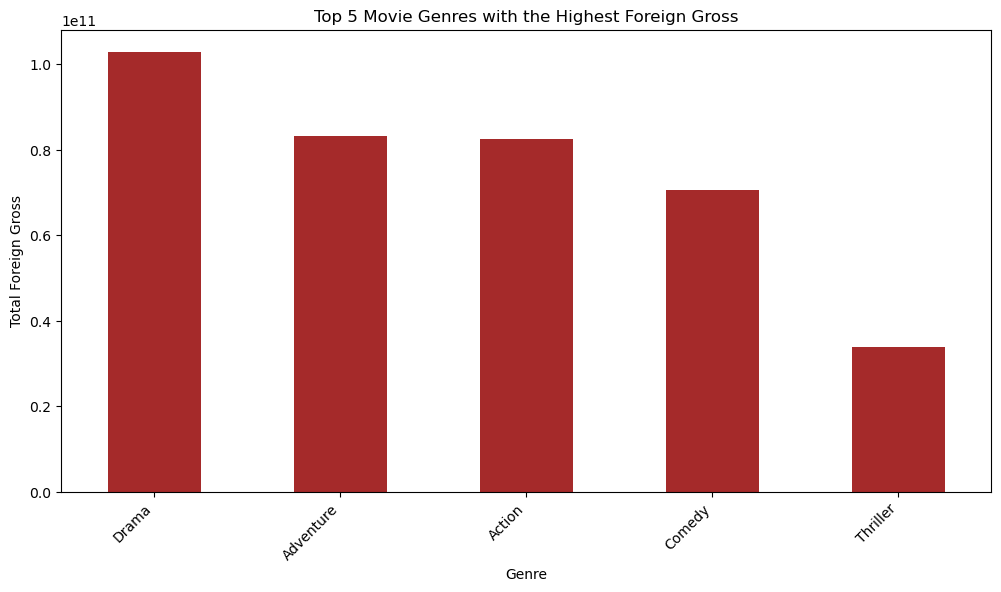

In [190]:
# Plot the top 5 genres with the highest foreign gross
plt.figure(figsize=(12, 6))
top_5_genres_foreign_gross.plot(kind='bar', color='brown')
plt.xlabel('Genre')
plt.ylabel('Total Foreign Gross')
plt.title('Top 5 Movie Genres with the Highest Foreign Gross')
plt.xticks(rotation=45, ha='right')
plt.show()

In [194]:
mode_runtime = df4['Runtime_minutes'].mode()[0]

print("The modular runtime minutes for movies is:",mode_runtime, "minutes")

The modular runtime minutes for movies is: 100.0 minutes


In [195]:
# Find the top 10 most popular movies based on the highest average rating
top_10_most_popular_movies = df4.nlargest(10, 'Average_Rating')

# Get the runtime of the top 10 most popular movies
top_10_most_popular_movies_runtime = top_10_most_popular_movies['Runtime_minutes']

print("Runtime of the top 10 most popular movies:")
print(top_10_most_popular_movies_runtime)
#This code will find and print the runtime of the top 10

Runtime of the top 10 most popular movies:
173     108.000000
658      78.000000
2039    115.000000
638      85.000000
1186     68.000000
514     148.000000
834      78.000000
2150    107.217114
2935    107.217114
3026     84.000000
Name: Runtime_minutes, dtype: float64


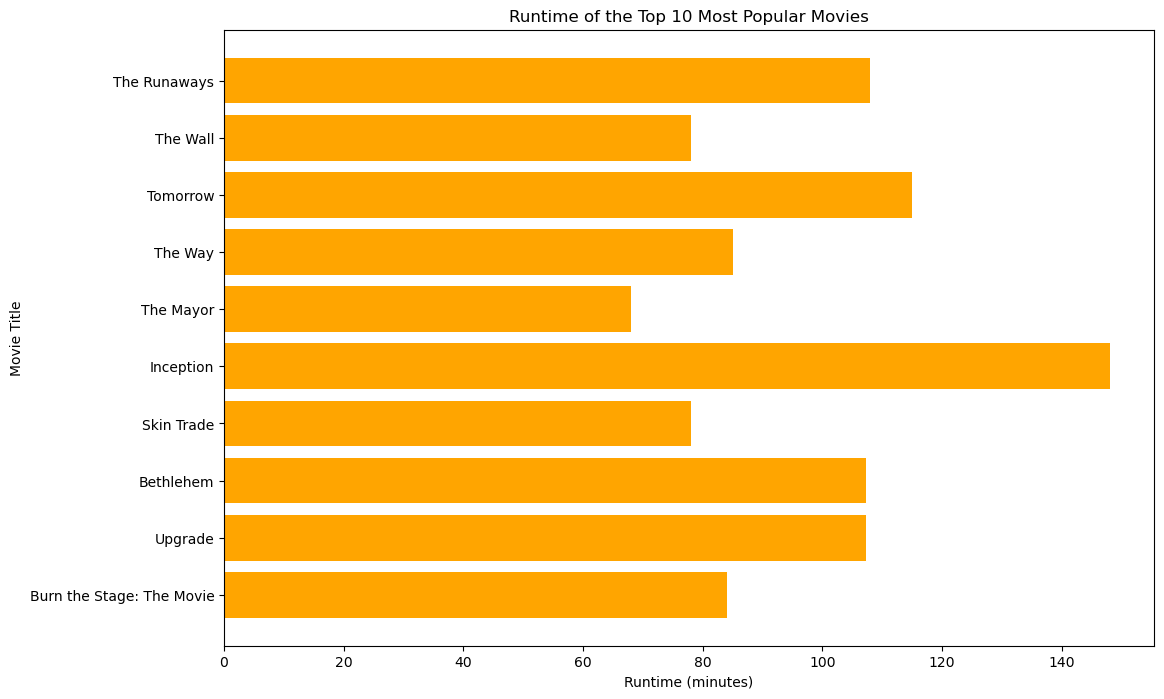

In [196]:
import matplotlib.pyplot as plt

# Find the top 10 most popular movies based on the highest average rating
top_10_most_popular_movies = df4.nlargest(10, 'Average_Rating')

# Get the movie titles and runtimes
movie_titles = top_10_most_popular_movies['Primary_title']
runtimes = top_10_most_popular_movies['Runtime_minutes']

# Plot the runtime of the top 10 most popular movies
plt.figure(figsize=(12, 8))
plt.barh(movie_titles, runtimes, color='orange')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Movie Title')
plt.title('Runtime of the Top 10 Most Popular Movies')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rating at the top
plt.show()

In this analysis we focused more on the genres of the movies produced in relation to the ratings and the gross that they brought both domestic and foreign.
We came to the followig conclusions:
- The top 5 genres that have the highest rating are Documentary, News, Biography, History, Sports. 
- The top 5 genres that have been produced by studios are Drama, Comedy, Action, Romance, Thriller. 
- The top 5 genres that have the highest domestic gross are Adventure, Action, Comedy, Drama, Sci-Fi.
- The top 5 genres that have the highest foreign gross are Drama, Adventure, Action, Comedy, Thriller. 
- Studios produce movies that bring in alot of gross than those that have higher ratings. We can see this in the comparison between mostproduced and high dometic gross. 
- Adventure and Drama genres have a high production rate and higher domestic rate. 
- That the ratings of a movie doesn't necessary mean that it will bring in a huge gross. 

#### Recommendations
- If the studio is looking to leave a mark in the society in terms of film they should produce movies that have higher ratings such as documenaries. 
- If the studio is looking to make profit they should produce movies that have high gross like action and drama. 
